<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное. ОТВЕТ - да: RM
2.   Равномерное. ОТВЕТ - нет
3.   Биноминальное. ОТВЕТ - нет
4.   Бернулли. ОТВЕТ - да: CHAS
5.   Геометрическое. ОТВЕТ - нет
6.   Логнормальное. ОТВЕТ - да: LSTAT



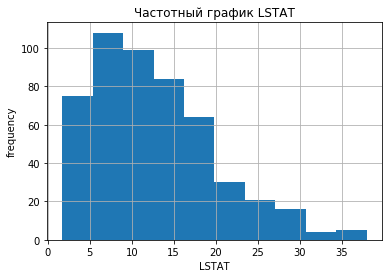

In [49]:
x = 'LSTAT'
crim_hist = plt.hist(data[x])

plt.xlabel(x)
plt.ylabel('frequency')
plt.title('Частотный график ' + x)
plt.grid(True)
plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

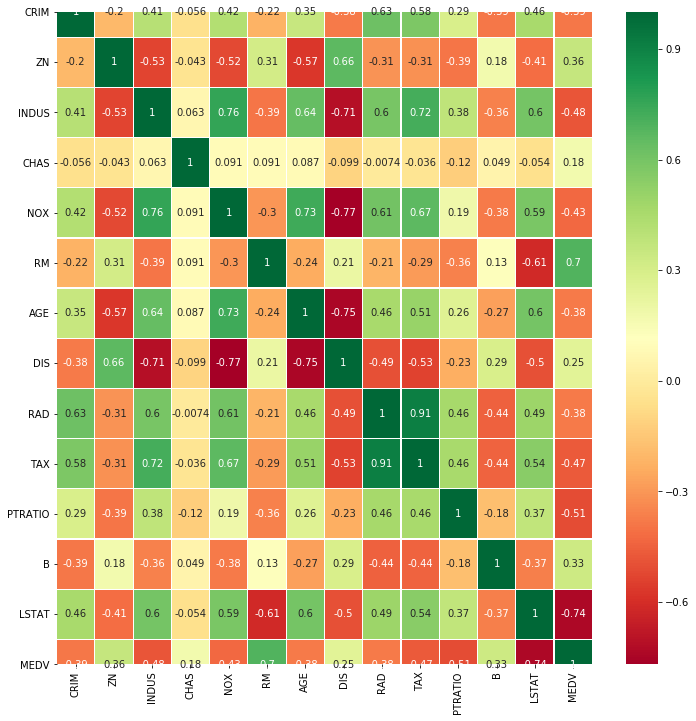

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [30]:
print ('С ценой на дома (MEDV) максимально коррелирует атрибут RM (количество комнат) и LSTAT (доля бедных)')

С ценой на дома (MEDV) максимально коррелирует атрибут RM (количество комнат) и LSTAT (доля бедных)


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

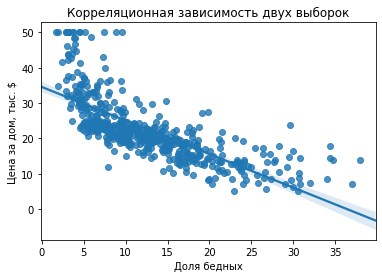

In [29]:
price = data['MEDV']
lstat = data['LSTAT']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = lstat, y = price, data = data, fit_reg = True)
plt.xlabel('Доля бедных')
plt.ylabel('Цена за дом, тыс. $')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [37]:
price = np.array(price).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
from sklearn.model_selection import train_test_split

# x = lstat,
# y = price
X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    price,
    test_size = 0.2
)

In [40]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
predicted_y = model.predict(X_test)

In [42]:
model.score(X_test, y_test)

0.5825211248402282

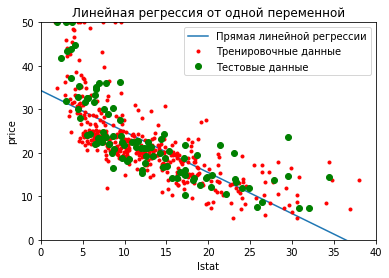

In [55]:
plt.xlabel('lstat')
plt.ylabel('price')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 30 точек для предсказаний
x = np.linspace(0, 50, 30)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,40)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [59]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [60]:
df.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [73]:
print ('Количество отсутствующих значений в таблице: ', sum(df.isnull().sum()))

Количество отсутствующих значений в таблице:  23


In [75]:
df.isnull().sum()
print ('В атрибуте Country пустых значений нет')

В атрибуте Country пустых значений нет


Сколько стран в выборке? Написать ответ. 

In [81]:
print ('В выборке ', len(df['Country (region)'].unique()), ' стран')

В выборке  156  стран


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

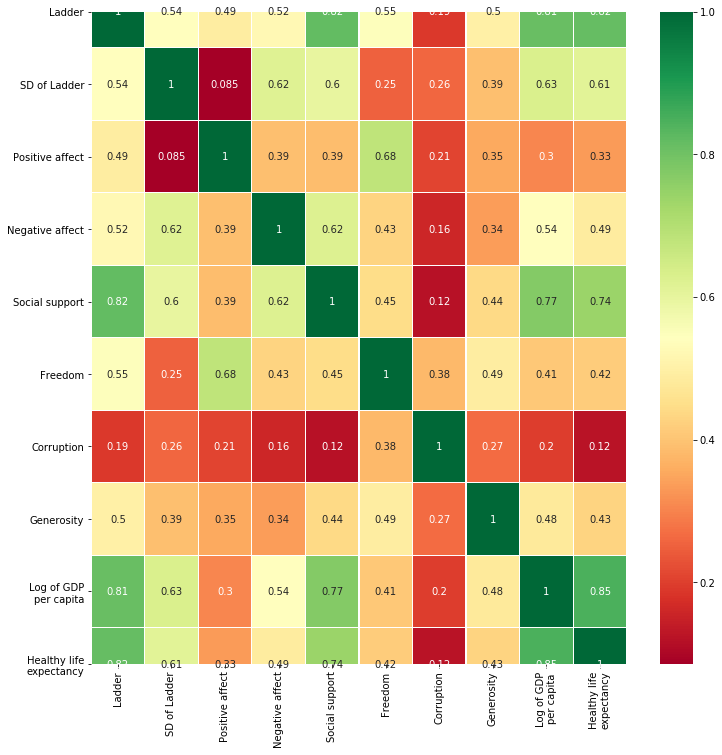

In [84]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Выводы:
   - основными факторами, влияющими на счастье, являются: здоровье, уровень ВВП, социальная поддержка 
   - социальная поддержка, уровень ВВП и здоровье заметно коррелируют друг с другом
   - у коррупции нет сильной корреляции ни с одним из показателей

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [183]:
n = 10
i = 1
a_list = []
while i <= n:
    a = np.random.randint (1, 7)
    a_list.append(a)
    i += 1

a_list

[2, 5, 1, 3, 6, 2, 4, 2, 3, 6]

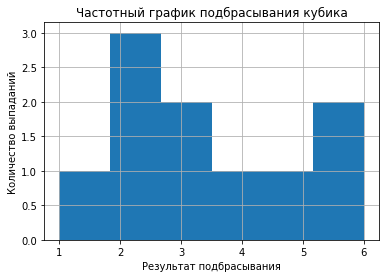

In [216]:
cube_hist = plt.hist(a_list, 6)

plt.xlabel('Результат подбрасывания')
plt.ylabel('Количество выпаданий')
plt.title('Частотный график подбрасывания кубика')
plt.grid(True)
plt.show()

In [197]:
print ('Это биномиальное распределение')

Это биномиальное распределение


Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [ ]:
n_elem = 1000
j = 1
list_sum_100attempts = []
n = 100
i = 1
sum_100attempts = 0
while j <= n_elem:
    while i <= n:
        a = np.random.randint (1, 7)
        sum_100attempts += a
        i += 1
    list_sum_100attempts.append(sum_100attempts)
    j += 1
    i = 1
    sum_100attempts = 0
list_sum_100attempts


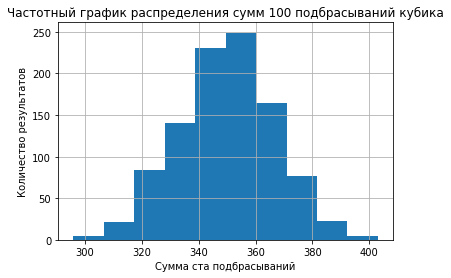

In [217]:
cube_hist = plt.hist(list_sum_100attempts)

plt.xlabel('Сумма ста подбрасываний')
plt.ylabel('Количество результатов')
plt.title('Частотный график распределения сумм 100 подбрасываний кубика')
plt.grid(True)
plt.show()

In [233]:
print ('График изменился потому, что стало много наблюдений. Каждое из которых стремится к мат ожиданию. \
Теперь на графике стало отчетливо видно, что результаты распределены около среднего. \
Распределение стало нормальным, поэтому можно применить центральную предельную теорему ')

График изменился потому, что стало много наблюдений. Каждое из которых стремится к мат ожиданию. Теперь на графике стало отчетливо видно, что результаты распределены около среднего. Распределение стало нормальным, поэтому можно применить центральную предельную теорему 
